<a href="https://colab.research.google.com/github/patty1997/Deep_Learning_Projects/blob/main/transfer_learning_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import cv2

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop

In [ ]:
SIZE = 32

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/Plant_Disease_CLassification/training_set/*"):
  label = directory_path.split("/")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/Plant_Disease_CLassification/testing_set/*"):
  fruit_label = directory_path.split("/")[-1]
  print(fruit_label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels) 

Pepper__bell___healthy
Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight
Tomato__Tomato_mosaic_virus
Tomato_Bacterial_spot
Tomato_Leaf_Mold
Pepper__bell___Bacterial_spot
Potato___healthy
Tomato_Septoria_leaf_spot
Tomato__Target_Spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Potato___Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Early_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Potato___Late_blight
Potato___healthy
Pepper__bell___Bacterial_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Early_blight
Tomato__Tomato_YellowLeaf__Curl_Virus


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
train_labels_encoded = le.fit_transform(train_labels)

print(np.unique(test_labels_encoded))
print(np.unique(train_labels_encoded))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

x_train = (x_train.astype('float32'))/255.
x_test = (x_test.astype('float32'))/255.

In [ ]:
print(x_train.shape)
print(x_test.shape)


(1497, 32, 32, 3)
(372, 32, 32, 3)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])
print(y_train[1])
print(y_test[23])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
drop =0.25

kernel_initializer = 'he_uniform'

model1= Sequential()

model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same',input_shape=(32,32,3)))
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same'))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(drop))

model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same'))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer=kernel_initializer,padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(15, activation='sigmoid'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen.fit(x_train)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
history = model1.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
24/24 [==============================] - 4s 42ms/step - loss: 3.3295 - accuracy: 0.0730 - val_loss: 2.7007 - val_accuracy: 0.1102
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 2.7381 - accuracy: 0.0572 - val_loss: 2.6943 - val_accuracy: 0.0968
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 2.7034 - accuracy: 0.0843 - val_loss: 2.6916 - val_accuracy: 0.1237
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 2.7120 - accuracy: 0.0529 - val_loss: 2.6892 - val_accuracy: 0.1290
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 2.6938 - accuracy: 0.0911 - val_loss: 2.6831 - val_accuracy: 0.1371
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 2.6932 - accuracy: 0.0962 - val_loss: 2.6767 - val_accuracy: 0.1263
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 2.6822 - accuracy: 0.0923 - val_loss: 2.6698 - val_accuracy: 0.1478
Epoch 8

In [ ]:
_, acc = model1.evaluate(x_test, y_test)
print("Accuracy = ",(acc * 100.0),"%")

12/12 [==============================] - 0s 11ms/step - loss: 0.7018 - accuracy: 0.7849
Accuracy =  78.49462628364563 %


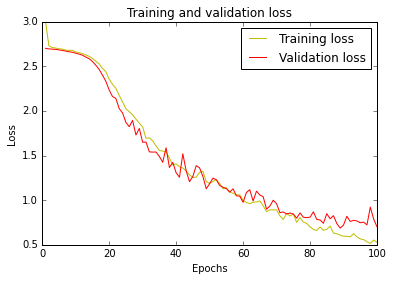

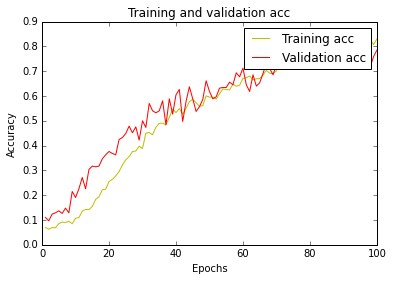

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training acc')
plt.plot(epochs,val_loss,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()